# **Clustering using K-Means**



In [0]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

### **Loading Data**

In [0]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data["data"])
df["target"] = data.target

#### get stratified Dataset from orginal data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[df.columns.difference(['target'])], df["target"], stratify=df["target"], \
                                                    test_size=90, random_state=28)
x_train.shape, x_test.shape , y_train.shape , y_test.shape
# store it in a dataframe 'df'
df = pd.DataFrame(x_train)
# maintain a list of all points
data= []
for index in range(df.shape[0]):
    data.append(tuple(df.iloc[index]))

In [283]:
display(df.head())
print('sample format of data : ')
data[:5]

,0,1,2,3
31,5.4,3.4,1.5,0.4
80,5.5,2.4,3.8,1.1
92,5.8,2.6,4.0,1.2
109,7.2,3.6,6.1,2.5
64,5.6,2.9,3.6,1.3


sample format of data : 


[(5.4, 3.4, 1.5, 0.4),
 (5.5, 2.4, 3.8, 1.1),
 (5.8, 2.6, 4.0, 1.2),
 (7.2, 3.6, 6.1, 2.5),
 (5.6, 2.9, 3.6, 1.3)]

### **Steps for K-Means Algorithm**:
**1)** Initialize 'k' centroids by picking randomly/choosively from data.

**2)** Assign data points to their corresponding clusters, based on the distance between centroids and each data point.

**3)** Shift/Re-initialize the centroids Ci, to the center of its cluster.

**4)** Repeat the steps 2 and 3 untill the centroids aren't moving any more.

### **Implementation**

In [0]:
class Distance:
    """
    This class 'Distance' has methods, calculates distance metrics like "euclidean", "manhattan", "cosine", "minkowski"
    These methods be called by creating object like Distance().euclidean_distance(point1, point2)
    Inputs: point1, point2.
    Output: return distance b/w points.
    """
    def __init__(self):
        pass        
    def euclidean_distance(self, point1, point2):
        return distance.euclidean(point1, point2)
    def manhattan_distance(self, point1, point2):
        return distance.cityblock(point1, point2)
    def cosine_distance(self, point1, point2):
        return distance.cosine(point1, point2)
    def minkowski_distance(self, point1, point2):        
        return distance.minkowski(point1, point2)

In [0]:
def initialize_centroids(data, n_clusters=3):
    """
    Input: Data points, n_clusters
    Output: Dictionary of size 'n_clusters, Where key='centroid' and value="[] empty list".
    """
    length = len(data)
    clusters={}
    for index in np.random.randint(0, length, size=(1,n_clusters))[0]:
        clusters[data[index]] = []        
    return clusters
    
def assign_points_to_centroids(data, clusters, distance_metric="euclidean"):
    """
    Input: Data points, Clusters(dict with key=centroid, val=[points......]) , distance_metric=['euclidean','cosine','manhattan','minkowski'].
    Output: Dictionary, Where key='centroid' and value="list of points that're close to that centroid".
    """    
    if distance_metric=="euclidean":
        dist_obj= Distance().euclidean_distance
    elif distance_metric=="cosine":
        dist_obj= Distance().cosine_distance
    elif distance_metric=="manhattan":
        dist_obj= Distance().manhattan_distance
    elif distance_metric=="minkowski":
        dist_obj= Distance().minkowski_distance
    
    centroids = list(clusters.keys())
    for point in data:
        close_centroid = ()
        min_dist = float("inf")
        if point not in centroids:
            for centroid in centroids: 
                curr_dist = dist_obj(point,centroid)
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    close_centroid = centroid  
            clusters[close_centroid].append(point)            
    return clusters
    
def update_centroids(clusters):
    """
    Input: Clusters(dict with key=centroid, val=[points......])
    Output: Dictionary, Where key='updated centroid' and value="[]"(empty list)
            Also returns whether to stop converging (or) not.      
    """
    new_clusters={}    
    for centroid in clusters:
        # finding mean of those points
        new_clusters[ tuple(np.mean(clusters[centroid], axis=0)) ] = []
    return new_clusters

### **pseudo code for K-Means**

initialize_centroids(args)

while max_iter:
>> assign_points_to_centroids(args)

>> update_centroids(args)

assign_points_to_centroids(args)



In [0]:
# Input parameter
n_clusters = 3
max_iter=300

clusters = initialize_centroids(data, n_clusters)
for i in range(max_iter=300):
    clusters = assign_points_to_centroids(data, clusters)
    clusters = update_centroids(clusters)
clusters = assign_points_to_centroids(data, clusters)

In [274]:
print("No of points in each cluster :", [len(clusters[i]) for i in clusters])

No of points in each cluster : [20, 14, 26]


### **Visualization - Scatter plots**

For visualization purpose, considered only two dimensions.

#### Orginal Data

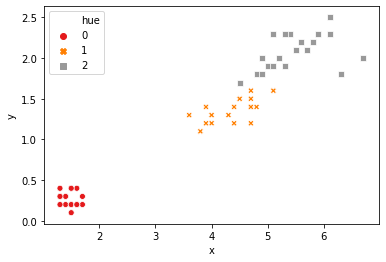

In [250]:
#@title
import matplotlib.pyplot as plt
import seaborn as sns

tdf = pd.DataFrame()
tdf["x"] = df.iloc[:,2]
tdf["y"] = df.iloc[:,3]
tdf["hue"] = y_train

ax = sns.scatterplot(x="x", y="y", hue="hue", data =tdf, style="hue", palette="Set1")
plt.show()

#### sklearn's K-Means clustering

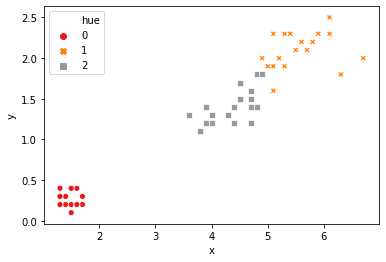

In [251]:
#@title
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3).fit(df.iloc[:,2:])
clustering.labels_

mdf = pd.DataFrame()
mdf["x"] = df.iloc[:,2]
mdf["y"] = df.iloc[:,3]
mdf["hue"] = clustering.labels_

ax = sns.scatterplot(x="x", y="y", hue="hue", data =mdf, style="hue", palette="Set1")
plt.show()

#### Scratch Code K-Means algorithm

The point in the midst of each cluster is a 'Centroid' of that cluster.

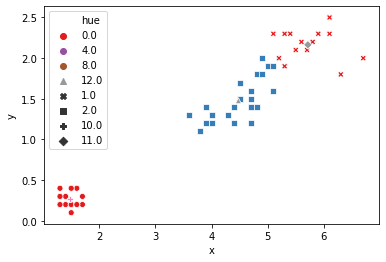

In [271]:
#@title
lst = []
excess_x=[]
excess_y=[]
cnt=0
xtra=10
for key in clusters:
  for i in clusters[key]:
    i=list(i)
    i.append(cnt)
    lst.append(i)
  lst.append(key+(xtra,))
  xtra+=1
  cnt+=1
adf = pd.DataFrame(np.array(lst))
rdf= pd.DataFrame()
rdf["x"] = adf.iloc[:,2]
rdf["y"] = adf.iloc[:,3]
rdf["hue"] = adf.iloc[:,-1]

ax = sns.scatterplot(x="x", y="y", hue="hue", data =rdf, style="hue", palette="Set1")